<a href="https://colab.research.google.com/github/hugozub/MIAD/blob/main/Practica23_al263169.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 23: Regresión Simple**
# **Objetivo**
Aplicar regresión lineal simple para modelar la relación entre la población de una ciudad (poblation) y las ganancias (profit) de un restaurante. Analizar los supuestos del modelo y evaluar su rendimiento.

# **Datos**
Trabajarás con el archivo restaurantes.csv, que contiene dos columnas:

* poblation: población de la ciudad (variable independiente). Tiene valores decimales mayores que cero. Estos valores representan la población de la ciudad multiplicada por 10,000. Por ejemplo, 6.1101 significa que la población de esa ciudad es 61,101.

* profit: ganancia del restaurante en esa ciudad (variable dependiente). Tiene valores decimales, algunos negativos y otros positivos. Estos representan las ganancias mensuales promedio de su restaurante en cada ciudad, en unidades de $10,000. Por ejemplo, 17.592 representa $175,920 en ganancias mensuales promedio para esa ciudad. -2.6807 representa -$26,807 en pérdidas mensuales promedio para esa ciudad.

# **Descripción del problema**
Supongamos que usted es el director ejecutivo de una franquicia de restaurantes y está considerando diferentes ciudades para abrir un nuevo local. Le gustaría expandir su negocio a ciudades que podrían generar mayores ganancias para su restaurante. La cadena ya tiene restaurantes en varias ciudades y usted cuenta con datos sobre ganancias y población de dichas ciudades. Deberá construir un modelo de regresión para explicar y predecir las ganancias a partir de la población.

---

**Parte 1: Carga de datos y bibliotecas**

* Importa las bibliotecas necesarias para realizar esta práctica

* Carga el archivo restaurantes.csv

* Muestra las primeras filas del dataframe.

* Describe estadísticamente el conjunto de datos.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [54]:
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
df = pd.read_csv('/content/drive/MyDrive/MIAD/Programación para analítica descriptiva y predictiva/Practica23/restaurantes.csv')
print(df.head(),"\n")
print(df.describe())

   poblation   profit
0     6.1101  17.5920
1     5.5277   9.1302
2     8.5186  13.6620
3     7.0032  11.8540
4     5.8598   6.8233 

       poblation     profit
count  97.000000  97.000000
mean    8.159800   5.839135
std     3.869884   5.510262
min     5.026900  -2.680700
25%     5.707700   1.986900
50%     6.589400   4.562300
75%     8.578100   7.046700
max    22.203000  24.147000


**Parte 2: Análisis exploratorio y relación entre variables**

2.1 Análisis de la Relación Lineal Entre Variable Dependiente y la Independiente

Grafica un diagrama de dispersión entre Poblation y Profit usando seaborn.scatterplot().

Responde:
¿La relación entre las variables parece lineal? ¿Por qué?
 - Si. Entre más crecé el eje x, más crece el eje y, existen,aunque los primeros registros se encuentran muy juntos, todos los puntos al rededor de una linea recta


<Axes: xlabel='poblation', ylabel='profit'>

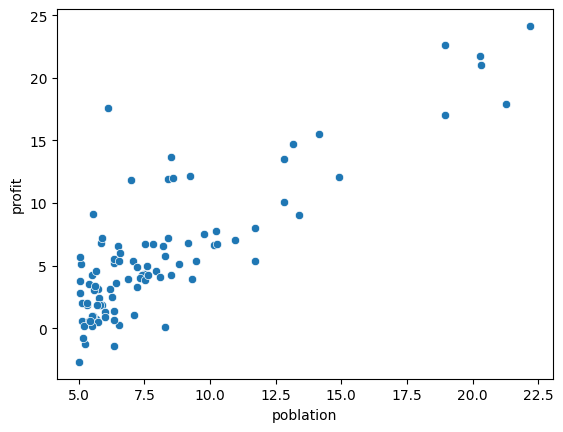

In [7]:
sns.scatterplot(x=df['poblation'], y=df['profit'])


**2.2 Cálculo e Interpretación de la Correlación**

Calcula el coeficiente de correlación de Pearson

Imprime el valor y responde lo siguiente:

- ¿Qué tan fuerte es la relación entre las variables?
    - Bastante, es aproximadamente 0.837, muy cerca del 1, y el p_value es muy pequeño

- ¿La dirección es positiva o negativa?
    - Positiva

- ¿Este valor es coherente con lo que observaste en el gráfico de dispersión?
    - Si lo es

In [10]:
print(pearsonr(df['poblation'], df['profit']))

PearsonRResult(statistic=np.float64(0.8378732325263409), pvalue=np.float64(1.0232099778760897e-26))


**Parte 3. Construcción del modelo, coeficientes y visualización**

**3.1 Construcción del modelo - obtención de los parámetros y coeficientes**

- Construye un modelo de regresión lineal simple usando las bibliotecas de Scikit-Learn
- Imprime el intercepto y el coeficiente de la regresión (pendiente)
- Interpreta el Intercepto: ¿Qué significa en términos del contexto del problema?
    - El intercepto es el punto de inicio cuando la población es cero, es decir, cuando no hay población, el profit es de -3.895
- Interpreta el coeficiente de la regresión ¿Qué significa en términos del contexto del problema?
    - Es el cambio que tiene cuando la población aumenta, por cada persona que crezca la población, el profit aumentará 1.193 en promedio


In [19]:
X = df["poblation"].to_numpy().reshape(-1, 1)
y = df["profit"].to_numpy()

regresion = LinearRegression()
modelo = regresion.fit(X, y)

intercepto = modelo.intercept_
coeficiente = modelo.coef_[0]

print("Intercepto:  ", intercepto)
print("Coeficiente:  ", coeficiente)

Intercepto:   -3.8957808783118484
Coeficiente:   1.1930336441895932


**3.2 Visualización del modelo**

Grafica los puntos originales (Poblation vs Profit) y dibuja la línea de regresión ajustada.

Asegúrate de incluir leyenda y títulos adecuados

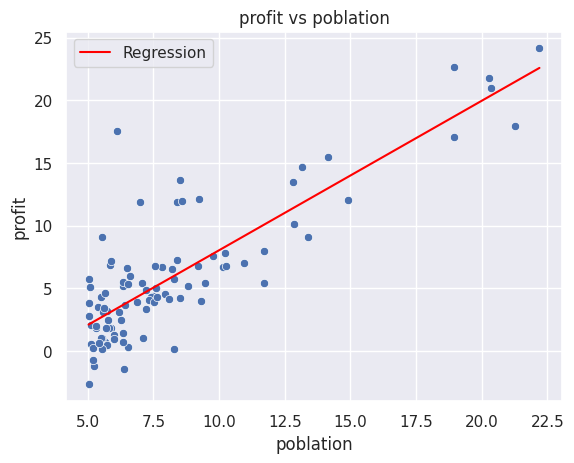

In [29]:
sns.scatterplot(x=df['poblation'], y=df['profit']).set(title='profit vs poblation')
sns.lineplot(x=df['poblation'], y=modelo.predict(X), color='red',label='Regression')
sns.set_theme(style="darkgrid")



**Parte 4. Supuestos del Modelo de Regresión**

**4.1. Normalidad de los residuos**

Calcula los residuos: diferencia entre los valores reales y los valores predichos.

Grafica los residuos usando histograma con KDE (Kernel Density Estimation)
Responde:

 - ¿Los residuos siguen una distribución aproximadamente normal?
    - Parece ser que sí, pero al aplicar la prueba de Shapiro-Wilk, nos da como resultado que no

Shapiro–Wilk: W=0.9095, p=5.496e-06 -> Se rechaza normalidad (α=0.05)


<Axes: ylabel='Count'>

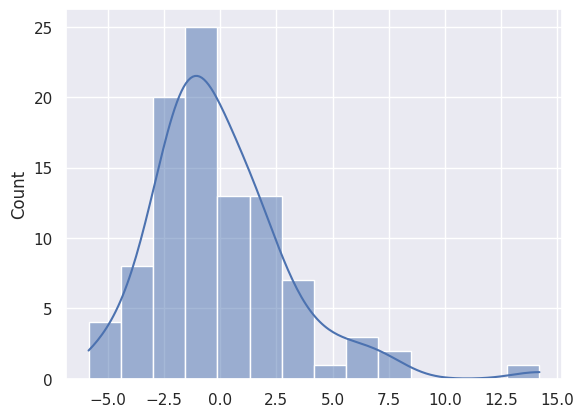

In [51]:
alpha = 0.05
W, p_shapiro = stats.shapiro(residuo)
print(f"Shapiro–Wilk: W={W:.4f}, p={p_shapiro:.4g} -> "
    f"{'No se rechaza normalidad' if p_shapiro>alpha else 'Se rechaza normalidad'} (α={alpha})")

y_hat = modelo.predict(X)
residuo = y - y_hat
#print(residuo)
sns.histplot(residuo, kde=True)

**4.2 Homocedasticidad**

Grafica los residuos contra los valores predichos.
Responde:
- ¿Los residuos están distribuidos de manera aleatoria o muestran algún patrón?
     - No encuentro algún patrón, solo la característica que la mayoría de puntos están centrados eje y(5,-5) ejex(5,10)

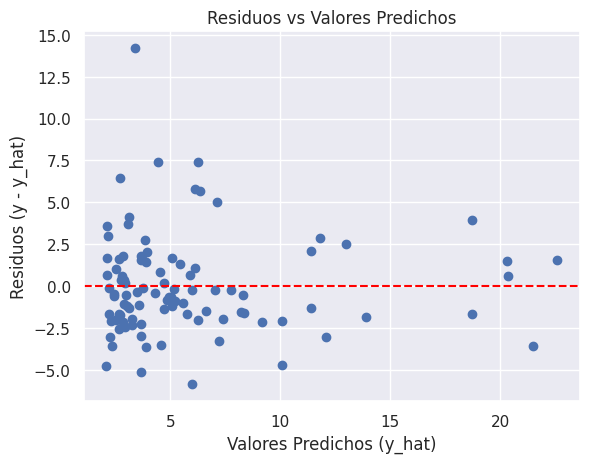

In [52]:
plt.scatter(y_hat, residuo)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuos vs Valores Predichos')
plt.xlabel('Valores Predichos (y_hat)')
plt.ylabel('Residuos (y - y_hat)')
plt.show()

**4.3 Q-Q Plot**

Graficar el Q-Q Plot
Interpreta el gráfico:
Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal.

Desviaciones sistemáticas indican asimetría o colas pesadas.

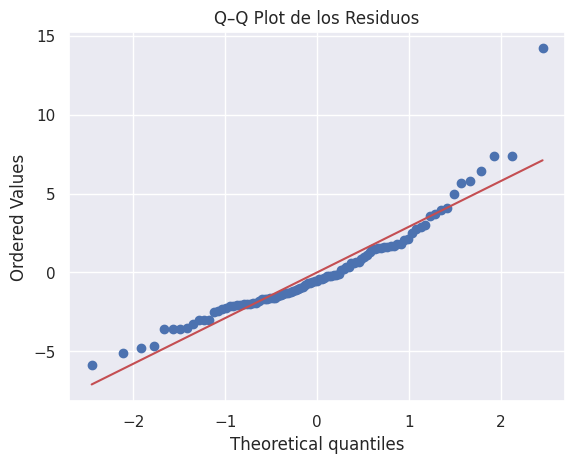

In [53]:
stats.probplot(resid, dist="norm", plot=plt)
plt.title('Q–Q Plot de los Residuos')
plt.show()

**Parte 5. Evaluación del Modelo**

* Calcula las métricas de evaluación:

    + MSE (Error cuadrático medio)

    + RMSE (Raíz del error cuadrático medio)

    + R² (Coeficiente de determinación)

* Responde: ¿Qué nos dicen estas métricas sobre el ajuste del modelo?
  + RMSE nos dice que las predicciones del modelo se desvían aproximadamente 3 unidades del valor real de profit y R^2 nos dice que aproximadamente el 70% de la variabilidad del profit puede explicarse a partir de la población.

In [56]:
mse  = mean_squared_error(y, y_hat)
rmse = np.sqrt(mse)
r2   = r2_score(y, y_hat)

print(f"MSE :{mse:.6f}")
print(f"RMSE:{rmse:.6f}")
print(f"R²  :{r2:.6f}")

MSE :8.953943
RMSE:2.992314
R²  :0.702032


**Parte 6: Conclusiones**

Responde:
**texto en negrita**
+ ¿Qué tan útil consideras el modelo para hacer predicciones?
    + Bastante útil, siempre considerando que existe un 30% de margen de error en las predicciones

+ ¿Cuáles son sus limitaciones?
    + Es un modelo lineal, si el comportamiento deja de ser lineal, entonces el modelo ya no servirá para describirlo, cuando la población es mayor a 20, parece que el profit empieza a incrementar, por lo que pudiera fallar el modelo cuando la población es mayor a 20

+ ¿Crees que es necesario hacer un ajuste o estandarización a las variables dependientes o independientes?  Si crees que es necesario hacerlo realiza el ajuste.
    + No hace falta